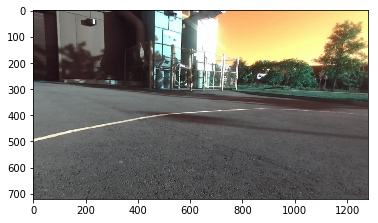

In [264]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread("circuit_sunny7.jpg")
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

plt.imshow(img_bgr)

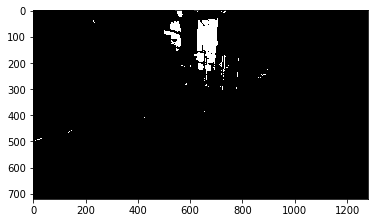

In [265]:
lowerb = np.array([0, 0, 250], np.uint8)
upperb = np.array([255, 25, 255], np.uint8)

# White threshold 
img_white_thres = cv2.inRange(img_hsv, lowerb, upperb)
plt.imshow(img_white_thres, cmap='gray')

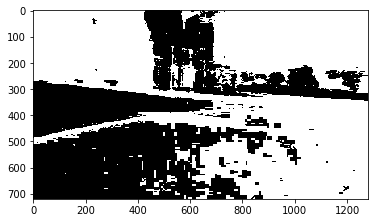

In [266]:
(channel_h, channel_s, channel_v) = cv2.split(img_hsv)

# thres1 = channel_s > 20

thres1 = cv2.inRange(channel_h, 70, 180, cv2.THRESH_BINARY_INV)

plt.imshow(thres1, cmap='gray')

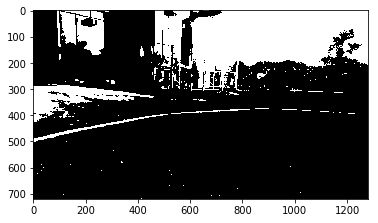

In [267]:
thres2 = cv2.inRange(channel_v, 125, 255, cv2.THRESH_BINARY_INV)

plt.imshow(thres2, cmap='gray')

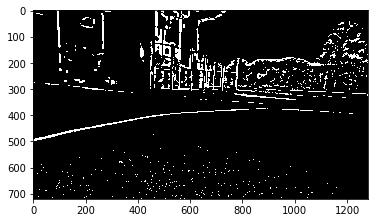

In [268]:
thres3 = cv2.adaptiveThreshold(channel_v, 255, 
                               cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY, 25, -20)
                               
plt.imshow(thres3, cmap='gray')

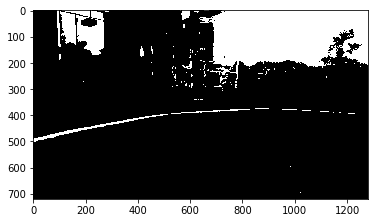

In [269]:
# thres_and = thres1 & thres2

thres_and = cv2.bitwise_and(thres1, thres2, thres3)

plt.imshow(thres_and, cmap='gray')

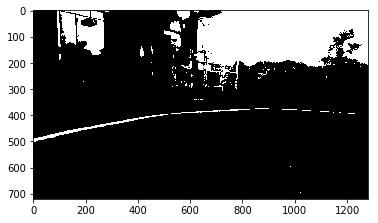

In [270]:
final_thres = cv2.bitwise_or(img_white_thres, thres_and)

plt.imshow(final_thres, cmap='gray')

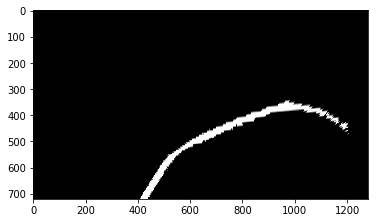

In [271]:
# Circuit race: (2m wide lanes)
src = np.float32([[500,350], [750,350], [1280,550], [0,450]])

# Drag race: (1.5m wide lanes)
# src = np.float32([[400,350], [760,350], [1280,500], [0,500]])
dst = np.float32([[300, 0], [900,0], [900,720], [300,720]])

img_size = (final_thres.shape[1], final_thres.shape[0])
    
M = cv2.getPerspectiveTransform(src, dst)
warped = cv2.warpPerspective(final_thres, M, img_size)

plt.imshow(warped, cmap='gray')

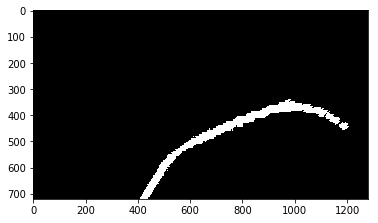

In [272]:
# Contours
blob_size = 100
filtered = np.zeros(warped.shape, np.uint8)

contours, _ = cv2.findContours(warped, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    if cv2.contourArea(cnt) >= blob_size: 
        cv2.drawContours(filtered, [cnt], -1, 255, -1)

plt.imshow(filtered, cmap='gray')